In [1]:
#import Dependencies, Python SQL toolkit and Object Relational Mapper
import os
import sqlite3
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, func, desc
from sqlalchemy.orm import sessionmaker
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, ForeignKey

###Reflect Tables into SQLAlchemy ORM###

In [2]:
#create path to database 
database_path = '../Resources/hawaii.sqlite'

In [3]:
# Create Engine
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [7]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

In [8]:
#view the Station table using pandas
df_station = pd.read_sql("SELECT * FROM Station", conn)
df_station

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [9]:
#view the Measurement table using pandas
df_measurement = pd.read_sql("SELECT * FROM Measurement", conn)
df_measurement

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


###Exploratory Precipitation Analysis###

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(most_recent_date)

2017-08-23


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)


In [12]:
# Perform a query to retrieve the date and precipitation scores
last_12_months_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()

In [13]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_12_months_data_df = pd.DataFrame(last_12_months_data, columns=['Date', 'Precipitation'])

In [14]:
# Sort the dataframe by date
last_12_months_data_df.sort_values('Date', ascending=True)

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


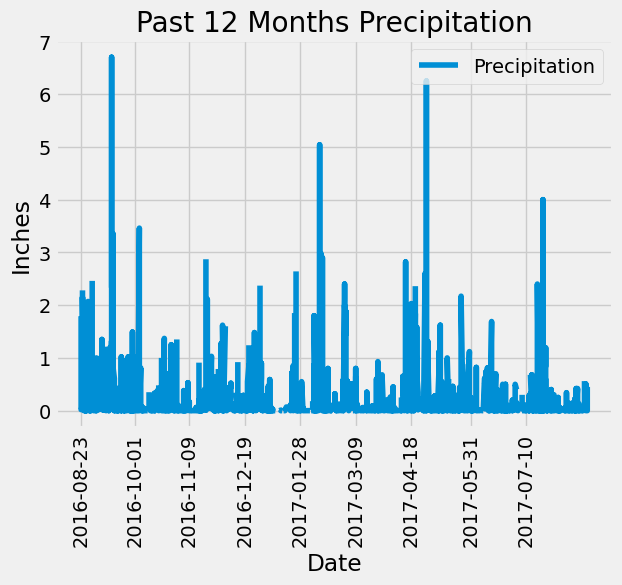

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the date and precipitation scores
last_12_months_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_12_months_data_df = pd.DataFrame(last_12_months_data, columns=['Date', 'Precipitation'])
# Sort the dataframe by date
last_12_months_data_df.sort_values('Date', ascending=True, inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(last_12_months_data_df['Date'], last_12_months_data_df['Precipitation'])
plt.title('Past 12 Months Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
xtick_labels = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
plt.xticks(xtick_labels, rotation=90)
plt.legend(['Precipitation'], loc=1)
plt.show()
#
# last_12_months_data_df.set_index('Date', inplace=True)
# last_12_months_data_df.plot(figsize=(10, 6), title='Past 12 Months Precipitation', legend=True)
# plt.xlabel('Date')
# plt.ylabel('Inches')
# xtick_labels = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
# plt.gird()
# plt.show

In [16]:
last_12_months_data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


###Exploratory Station Analysis###

In [17]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station.distinct())).scalar()
print(total_stations)


9


In [18]:
df_measurement

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

# Perform the query
active_stations_query = (
    session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
    
)
active_stations_query

# Fetch and print the results
#active_stations = active_stations_query.all()
#for station, count in active_stations:
 #   print(f'Station ID: {station_id}, Count: {count}')



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
session.query(func.min(Measurement.tobs),
                        func.max(Measurement.tobs),
                        func.avg(Measurement.tobs)).\
                        filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

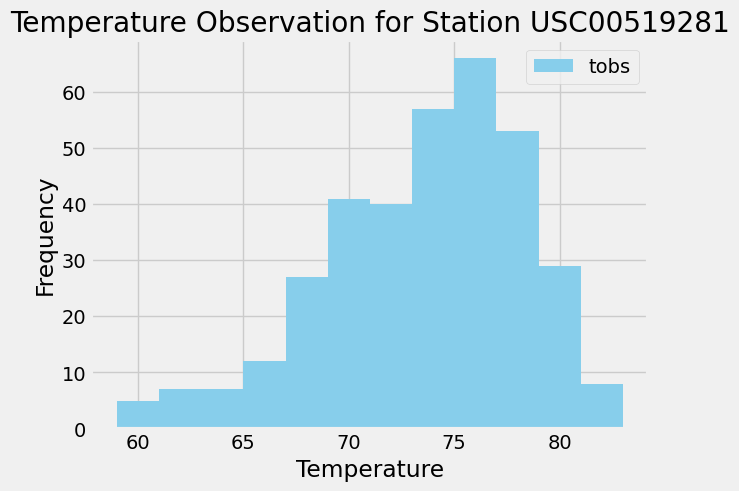

In [21]:
tobs_last_12_months_USC00519281 = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= query_date).all()

activate_stations_tobs_df = pd.DataFrame(tobs_last_12_months_USC00519281, columns=['Temperature'])

plt.hist(activate_stations_tobs_df['Temperature'], bins=12, color='skyblue')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'], loc=1)
plt.title('Temperature Observation for Station USC00519281')
plt.show

In [22]:
# Close Session
session.close()